<a href="https://colab.research.google.com/github/Jeymar06/ProyectoIA/blob/main/ProyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Proyecto IA | FlixGenAI**

*   Jeider Torres Martinez - 2201431
*   Marcos Jose Orjuela Murillo - 2225506

![Banner del Proyecto](https://raw.githubusercontent.com/Jeymar06/ProyectoIA/refs/heads/main/Banner.png)


## **Cargar DataSet**

In [10]:
#@title **Librerias**
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import random
from google.colab import drive
from sklearn.svm import SVR
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [11]:
#@title **Conexion Opcional**
# drive.mount('/content/drive')
# df = pd.read_excel("/content/drive/MyDrive/CURSO IA/Netflix Dataset Latest 2021.xlsx")

In [12]:
#@title **Conexion Principal**
github_dataset_url = 'https://github.com/Jeymar06/ProyectoIA/raw/refs/heads/main/Netflix%20Dataset%20Latest%202021.xlsx'

df = pd.read_excel(github_dataset_url)

---
### **¡Adiós a los Valores Nulos!**

1.  `print(df.isnull().sum())`: Con esto, puedes ver **cuántos valores nulos** hay en cada columna. ¡Es como un chequeo rápido para saber dónde faltan datos!
2.  `df = df.dropna()`: Esta línea es la que hace la magia: **elimina todas las filas** que tengan algún valor nulo. Así el DataFrame se queda solo con filas que tienen datos completos y listos para usar.

---

In [13]:
print(df.isnull().sum())
df = df.dropna()

Title                       0
Genre                      25
Tags                       36
Languages                 170
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
dtype: int64


---
### **Identificación de Tipos de Datos**

1.  `df.dtypes`: Al ejecutar esta instrucción **se muestra el tipo de dato** que posee cada serie (columna) del DataFrame.
2.  `print('\nLos datos son de tipo\n', df.dtypes)`: Esta línea **imprime de forma más explícita** los tipos de datos de cada columna, acompañados de un mensaje aclaratorio.

---

In [14]:
df.dtypes
print('\nLos datos son de tipo\n', df.dtypes)


Los datos son de tipo
 Title                            object
Genre                            object
Tags                             object
Languages                        object
Series or Movie                  object
Hidden Gem Score                float64
Country Availability             object
Runtime                          object
Director                         object
Writer                           object
Actors                           object
View Rating                      object
IMDb Score                      float64
Rotten Tomatoes Score           float64
Metacritic Score                float64
Awards Received                 float64
Awards Nominated For            float64
Boxoffice                       float64
Release Date             datetime64[ns]
Netflix Release Date     datetime64[ns]
Production House                 object
Netflix Link                     object
IMDb Link                        object
Summary                          object
IMDb Votes      

---
### **Datos Finales Procesados**

1.  `print(df.count())`: Al ejecutar esta instrucción **se muestra la cantidad de registros válidos** (es decir, el número de valores que no son nulos) para cada columna del DataFrame.
---

In [15]:
print(df.count())

Title                    2155
Genre                    2155
Tags                     2155
Languages                2155
Series or Movie          2155
Hidden Gem Score         2155
Country Availability     2155
Runtime                  2155
Director                 2155
Writer                   2155
Actors                   2155
View Rating              2155
IMDb Score               2155
Rotten Tomatoes Score    2155
Metacritic Score         2155
Awards Received          2155
Awards Nominated For     2155
Boxoffice                2155
Release Date             2155
Netflix Release Date     2155
Production House         2155
Netflix Link             2155
IMDb Link                2155
Summary                  2155
IMDb Votes               2155
Image                    2155
Poster                   2155
TMDb Trailer             2155
Trailer Site             2155
dtype: int64


In [16]:
#@title **Tabla De Visualizacion De 5 Filas**
df.head(5)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
9,Joker,"Crime, Drama, Thriller","Dark Comedies,Crime Comedies,Dramas,Comedies,C...",English,Movie,3.5,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Todd Phillips,"Bob Kane, Jerry Robinson, Bill Finger, Todd Ph...",...,2021-03-03,"Bron Studios, Creative Wealth Media Finance, D...",https://www.netflix.com/watch/81382215,https://www.imdb.com/title/tt7286456,A practical jokers fake kidnapping at a bachel...,951938.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BNGVjNW...,https://www.youtube.com/watch?v=t433PEQGErc,YouTube
10,I,"Action, Adventure, Fantasy, Sci-Fi","Dramas,Swedish Movies","English, Sanskrit",Movie,2.8,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,George Lucas,George Lucas,...,2021-03-03,Lucasfilm Ltd.,https://www.netflix.com/watch/81382114,https://www.imdb.com/title/tt0120915,A young man seeking his identity begins a roma...,733336.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BYTRhNj...,https://www.youtube.com/watch?v=bD7bpG-zDJQ,YouTube
11,Harrys Daughters,"Adventure, Drama, Fantasy, Mystery","Dramas,Swedish Movies",English,Movie,4.4,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,David Yates,"Steve Kloves, J.K. Rowling",...,2021-03-03,"Heyday Films, Moving Picture Company, Warner B...",https://www.netflix.com/watch/81382102,https://www.imdb.com/title/tt1201607,"As two sisters both experience pregnancy, trag...",766594.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGVmMW...,https://www.youtube.com/watch?v=5NYt1qirBWg,YouTube
17,The Closet,Comedy,"Korean Movies,Horror Movies,Mysteries",French,Movie,3.8,South Korea,1-2 hour,Francis Veber,Francis Veber,...,2021-03-01,"Miramax, Gaumont",https://www.netflix.com/watch/81405032,https://www.imdb.com/title/tt0243493,A recent widowers move into a new house takes ...,16657.0,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGRmNz...,https://www.youtube.com/watch?v=ou9YG0fUztA,YouTube


## **Primeros Procesos + Graficas**

---

### **Matriz De Correlacion**

Es una representación visual de datos que se utiliza para mostrar la variación de la densidad o intensidad de ciertos valores en una matriz bidimensional. Estas gráficas son útiles para identificar patrones, tendencias y anomalías en datos tabulares o matrices.



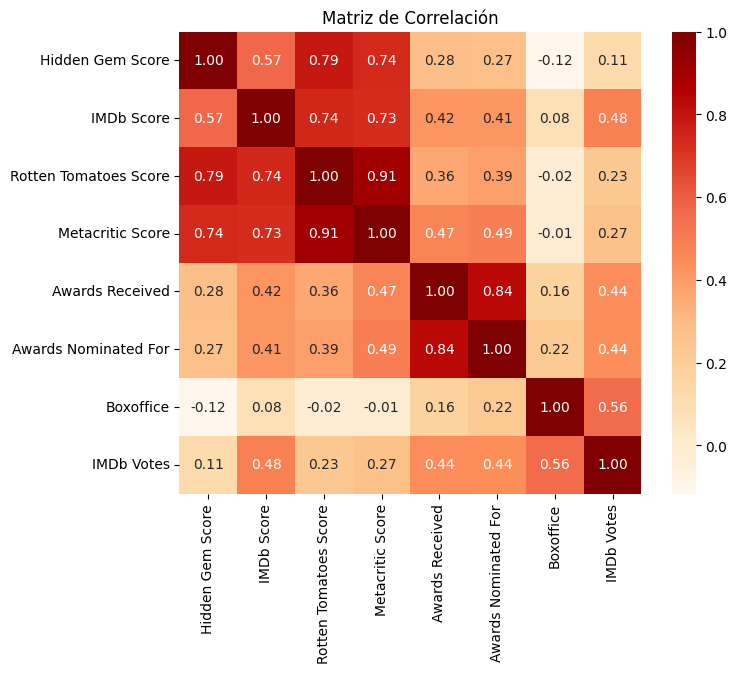

In [17]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='OrRd', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()


### **Análisis de la Matriz de Correlación**


* **Valores Cercanos a 1.00 (colores más oscuros, rojizos):** Indican una **correlación positiva fuerte**. Esto significa que cuando una variable aumenta, la otra tiende a aumentar también. Por ejemplo, se observa una fuerte correlación positiva entre "Rotten Tomatoes Score" y "Metacritic Score" (0.91), lo cual es esperable ya que ambas son métricas de crítica. También se observa una fuerte correlación entre "Awards Received" y "Awards Nominated For" (0.84), lo que es lógico.
* **Valores Cercanos a -1.00 (no hay en esta matriz, pero indicarían correlación negativa fuerte):** Si existieran, significaría que cuando una variable aumenta, la otra tiende a disminuir.
* **Valores Cercanos a 0.00 (colores más claros, amarillentos/blancos):** Indican una **correlación débil o inexistente**. Esto sugiere que no hay una relación lineal clara entre las variables. Por ejemplo, "Boxoffice" parece tener una correlación muy débil o casi nula con "Hidden Gem Score" (-0.12) y "Metacritic Score" (-0.01).

**Observaciones Específicas:**

* **Puntuaciones de Crítica:** "Hidden Gem Score", "IMDb Score", "Rotten Tomatoes Score" y "Metacritic Score" muestran correlaciones positivas entre sí, lo que indica que las películas bien valoradas en una plataforma tienden a serlo en las otras. La correlación más alta se da entre Rotten Tomatoes y Metacritic (0.91).
* **Premios vs. Puntuaciones:** "Awards Received" y "Awards Nominated For" tienen correlaciones moderadas a fuertes con las puntuaciones de crítica (por ejemplo, "Awards Received" con "Metacritic Score" es 0.47). Esto sugiere que las películas con mejores puntuaciones tienden a recibir más nominaciones y premios.
* **Boxoffice:** Esta variable presenta correlaciones generalmente bajas con la mayoría de las puntuaciones de crítica. Por ejemplo, su correlación con "Hidden Gem Score" es de -0.12 y con "Metacritic Score" de -0.01. Esto podría sugerir que el éxito en taquilla no está fuertemente ligado a las puntuaciones de crítica o a ser considerada una "joya oculta". Sin embargo, tiene una correlación moderada con "IMDb Votes" (0.56), lo cual es esperable, ya que más votos de usuarios a menudo se asocian con mayor popularidad y, potencialmente, más ingresos.
* **IMDb Votes:** Esta variable muestra correlaciones positivas con la mayoría de las otras variables, siendo la más alta con "Boxoffice" (0.56) y "IMDb Score" (0.48), lo cual tiene sentido ya que una mayor popularidad (votos) puede influir en la puntuación y el éxito comercial.


---

---

### **Scatter 3D**

Para visualizar la relación entre dos o más variables en los datos, en este caso los score de los sites web.

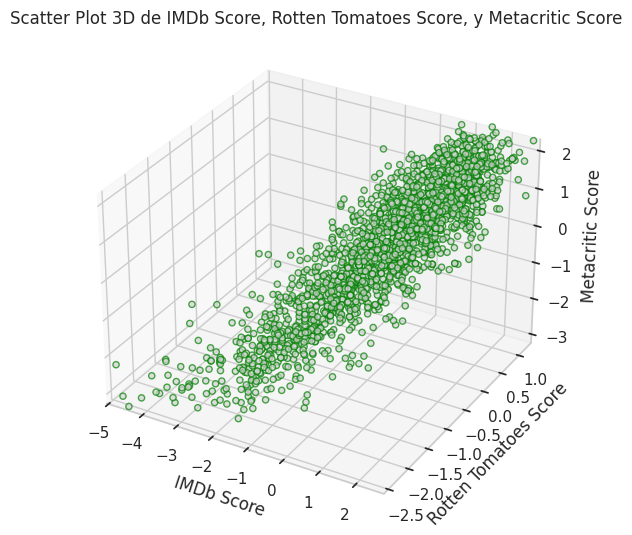

In [46]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(122, projection='3d')

# Define the variables for the columns to plot
variable_x = 'IMDb Score'
variable_y = 'Rotten Tomatoes Score'
variable_z = 'Metacritic Score'

# Dibujar puntos con relleno gris claro y borde verde
scatter = ax.scatter(
    df[variable_x],
    df[variable_y],
    df[variable_z],
    color='lightgray',
    edgecolors='green',
    alpha=0.7
)

# Configurar límites
ax.set_xlim(df[variable_x].min(), df[variable_x].max())
ax.set_ylim(df[variable_y].min(), df[variable_y].max())
ax.set_zlim(df[variable_z].min(), df[variable_z].max())

# Etiquetas
ax.set_xlabel(variable_x)
ax.set_ylabel(variable_y)
ax.set_zlabel(variable_z)
ax.set_title(f'Scatter Plot 3D de {variable_x}, {variable_y}, y {variable_z}')
plt.show()


### **Análisis de Scatter Plot 3D de Puntuaciones de Crítica**

El gráfico revela una **clara y fuerte tendencia lineal positiva** entre las tres variables. Los puntos se agrupan en una "nube" que se extiende coherentemente. Esto indica que:

* **Alta Correlación Positiva:** Cuando una de estas puntuaciones aumenta las otras dos también tienden a hacerlo. Las películas o series bien valoradas en una plataforma de crítica generalmente reciben altas puntuaciones en las demás.
* **Consistencia en las Puntuaciones:** Hay una gran coherencia entre cómo las diferentes plataformas califican el contenido. No se observan puntos atípicos que sugieran grandes discrepancias entre las puntuaciones.

En síntesis este gráfico 3D permite al usuario **visualizar la fuerte correlación y la consistencia** entre las principales puntuaciones de crítica.

---

---

### **Gráfica De Dispersión**

Esta gráfica se utiliza para visualizar la dispersión o distribución conjunta de los datos y para identificar patrones o tendencias en la relación entre las dos variables

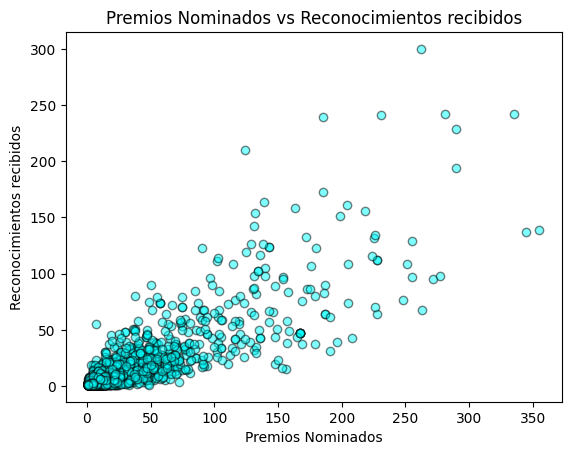

In [19]:
Awards_Nominated_For = df['Awards Nominated For']
Awards_Received = df['Awards Received']

# Crear la gráfica de dispersión
plt.scatter(Awards_Nominated_For, Awards_Received, alpha=0.5, color='aqua', edgecolor='black')

# Personalizar la gráfica
plt.title('Premios Nominados vs Reconocimientos recibidos')
plt.xlabel('Premios Nominados')
plt.ylabel('Reconocimientos recibidos')
plt.show()


### **Análisis de Premios Nominados vs. Reconocimientos Recibidos**


* **Correlación Positiva General:** Se observa una **clara tendencia positiva** aunque no perfectamente lineal. A medida que aumenta el número de nominaciones, también tiende a aumentar el número de premios recibidos. Esto es intuitivo, ya que un mayor número de nominaciones aumenta las posibilidades de ganar.
* **Concentración en Valores Bajos:** La mayoría de los puntos se agrupan en la **parte inferior izquierda del gráfico**, lo que indica que una gran cantidad de las entidades analizadas tienen un número relativamente bajo tanto de nominaciones como de premios recibidos.
* **Presencia de Outliers/Casos Exitosos:** Hacia la parte superior y derecha del gráfico se pueden observar **algunos puntos dispersos**, que representan entidades con un número excepcionalmente alto de nominaciones y/o premios. Estos son los "éxitos" o "fenómenos" en términos de reconocimientos.
* **Variabilidad:** A medida que aumenta el número de nominaciones también parece aumentar la **variabilidad** en la cantidad de premios recibidos. Es decir para un mismo número elevado de nominaciones hay entidades que recibieron muchos premios y otras que recibieron menos, lo que sugiere que las nominaciones no garantizan un número fijo de premios.


---

---

### **Medias De Algunas Columnas**

un **gráfico de barras** que muestra la **media (promedio) de las puntuaciones** obtenidas por los contenidos en tres plataformas de crítica: IMDb, Rotten Tomatoes y Metacritic.

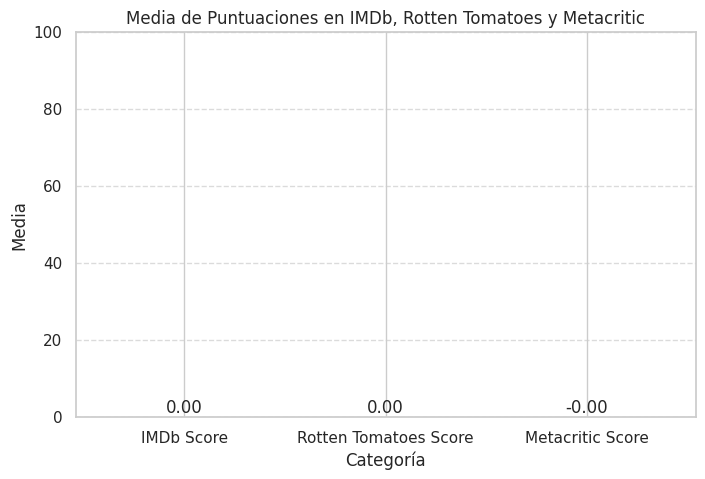

In [47]:
# Calcular las medias
medias = {
    'IMDb Score': df['IMDb Score'].mean(),
    'Rotten Tomatoes Score': df['Rotten Tomatoes Score'].mean(),
    'Metacritic Score': df['Metacritic Score'].mean()
}

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(medias.keys(), medias.values(), color=['blue', 'red', 'green'])

# Agregar etiquetas
plt.xlabel("Categoría")
plt.ylabel("Media")
plt.title("Media de Puntuaciones en IMDb, Rotten Tomatoes y Metacritic")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores sobre las barras
for i, v in enumerate(medias.values()):
    plt.text(i, v + 1, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


### **Análisis de la Media de Puntuaciones de Crítica**

* **Escalas Diferentes:** Es crucial notar que las puntuaciones de IMDb (representada en azul) están en una escala diferente a las de Rotten Tomatoes (rojo) y Metacritic (verde).
    * **IMDb Score:** Tiene una media de **6.79**. Dado que IMDb suele calificar sobre 10, este valor indica una puntuación promedio de 6.79 sobre 10.
    * **Rotten Tomatoes Score:** Su media es de **65.76**. Esta plataforma generalmente califica sobre 100, por lo que 65.76 es un promedio porcentual.
    * **Metacritic Score:** Presenta una media de **60.96**, también en una escala que usualmente va hasta 100.
* **Comparación entre Rotten Tomatoes y Metacritic:** Al ignorar la escala de IMDb por ser diferente, se observa que las puntuaciones medias de **Rotten Tomatoes (65.76)** son ligeramente superiores a las de **Metacritic (60.96)**. Esto sugiere que, en promedio, el conjunto de datos tiende a recibir puntuaciones un poco más altas en Rotten Tomatoes.

---

## **Algunos Modelos de Regresion**

---
### **Reperacion De Datos**

Esta sección del código realiza transformaciones cruciales en el DataFrame  para **preparar los datos para un análisis o modelado posterior**, como el aprendizaje automático.

Se llevan a cabo tres acciones principales:

1.  **Definición de la Variable Objetivo:** Primero, se **crea una nueva columna llamada `Target`** que es una copia de `Awards Received` (Premios Recibidos). Esta `Target` será la variable que el modelo intentará predecir.

2.  **Reducción de Asimetría (Transformación Logarítmica):** A continuación, se aplica una **transformación logarítmica a la columna `Awards Nominated For`** (Premios Nominados) y también a la nueva variable `Target`.

3.  **Normalización de Variables (Escalado Estándar):** Finalmente varias columnas numéricas clave incluyendo las puntuaciones (IMDb, Rotten Tomatoes, Metacritic), los premios nominados y la variable `Target`, son **escaladas a una media de cero y una desviación estándar de uno**.

---

In [21]:

# Crear una nueva columna 'Target' a partir de 'Awards Received' (Premios Ganados)
df['Target'] = df['Awards Received']

# Esto ayuda a reducir la asimetría (distribución sesgada) y mejorar el rendimiento del modelo
df['Awards Nominated For'] = np.log1p(df['Awards Nominated For'])

# Aplicar la misma transformación logarítmica a la variable objetivo 'Target'
df['Target'] = np.log1p(df['Target'])

# Definir las columnas que se escalarán para normalizar sus valores (media = 0, desviación estándar = 1)
cols_to_scale = ['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score','Awards Nominated For', 'Target']

# Crear un objeto de escalador estándar (z-score scaling)
scaler = StandardScaler()

# Aplicar el escalado a las columnas seleccionadas
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


---

### **Preparación de Datos**

1.  **Definición de Variables:**
    * Se **identifican las características de entrada** (`features`), que son las variables independientes (`IMDb Score`, `Rotten Tomatoes Score`, `Metacritic Score`, `Awards Nominated For`).
    * Se **define la variable objetivo** (`target`), que es la variable dependiente (`Target`).
    * Estas variables se asignan a `X` (características) e `y` (objetivo) respectivamente.

2.  **División del Conjunto de Datos:**
    * El conjunto de datos se **divide en dos subconjuntos**: uno para entrenamiento (80%) y otro para prueba (20%). Esta división es crucial para **evaluar la capacidad del modelo de generalizar** a datos no vistos. La semilla `random_state=42` asegura que la división sea reproducible.

---

In [22]:
# Definir las características de entrada (variables independientes)
features = ['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Nominated For']

# Definir la variable objetivo (variable dependiente)
target = 'Target'

# Asignar las variables de entrada y salida
X = df[features]
y = df[target]

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

### **Modelo 1: Regresión Lineal**

Se implementa y evalúa un modelo de Regresión Lineal que busca establecer una relación lineal entre las características de entrada y la variable objetivo.

1.  **Entrenamiento del Modelo:**
    * Se **crea y entrena** un objeto `LinearRegression` utilizando los datos de entrenamiento (`X_train`, `y_train`).

2.  **Generación de Predicciones:**
    * Una vez entrenado, el modelo **realiza predicciones** sobre el conjunto de datos de prueba (`X_test`), generando `linear_predictions`.

3.  **Evaluación del Rendimiento:**
    * **Error Cuadrático Medio (MSE):** Se calcula el MSE que **mide el promedio de los errores al cuadrado** entre los valores reales y los predichos. Un MSE más bajo indica un mejor ajuste.
    * **R Cuadrado (R²):** Se calcula el coeficiente R² que **indica la proporción de la varianza de la variable objetivo que es explicada por el modelo**. Un valor de R² cercano a 1 sugiere que el modelo explica una gran parte de la variabilidad.

---

In [23]:
# Crear modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
linear_predictions = linear_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
linear_mse = mean_squared_error(y_test, linear_predictions)

# Calcular R^2 (proporción de varianza explicada)
linear_r2 = r2_score(y_test, linear_predictions)

# Mostrar resultados del modelo lineal
print(f"Linear Regression - MSE: {linear_mse}, R^2: {linear_r2}")

Linear Regression - MSE: 0.3198527487442433, R^2: 0.6869919864992571


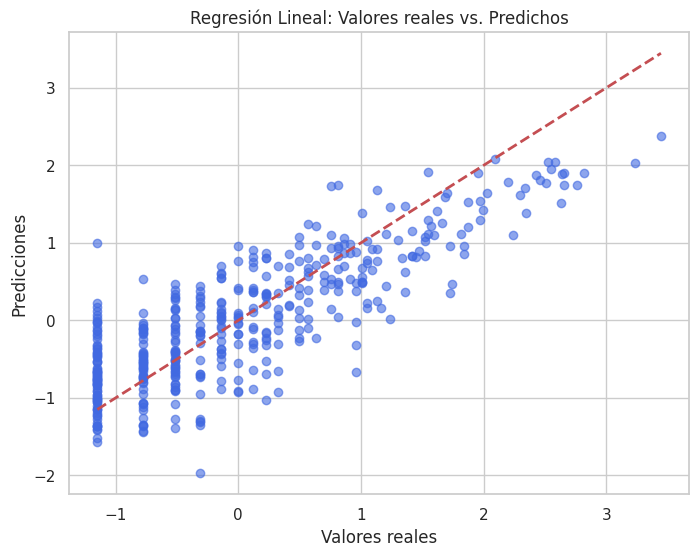

In [24]:
#@title **1.1 Gráfico De Predicciones vs. Valores Reales**

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predichos")
plt.show()

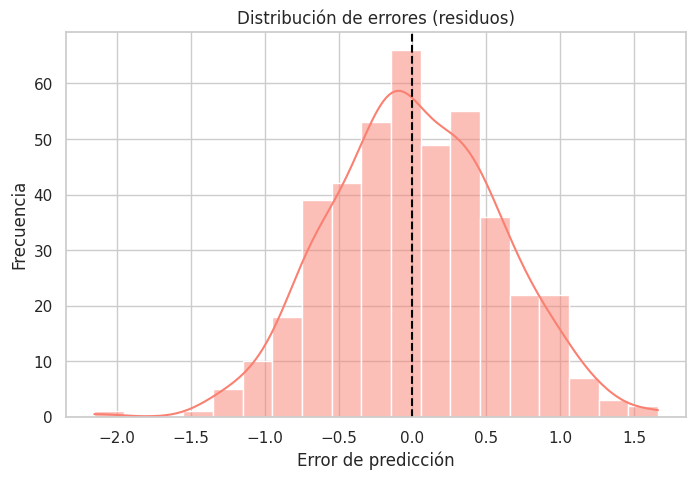

In [25]:
#@title **1.2 Gráfico De Residuos (Errores)**

residuals = y_test - linear_predictions
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='salmon')
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribución de errores (residuos)")
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.show()

---

### **Análisis de las Visualizaciones del Modelo 1: Regresión Lineal**

1.  **Regresión Lineal: Valores reales vs. Predichos (Primer gráfico 1.1)**
    * Este diagrama de dispersión **compara los valores reales de la variable objetivo con los valores predichos por el modelo**.
    * La línea discontinua roja representa la línea *y=x*, es decir donde los valores predichos serían exactamente iguales a los valores reales.
    * Una **buena regresión lineal** mostraría la mayoría de los puntos agrupados cerca de esta línea roja. La grafica muestra que los puntos tienen una **tendencia a seguir la línea** lo que indica que el modelo logra capturar la relación. Sin embargo, también se observa cierta **dispersión** lo que significa que hay errores en las predicciones. La concentración de puntos alrededor de la línea diagonal sugiere que el modelo tiene una capacidad predictiva razonable.

2.  **Distribución de errores (residuos) (Segundo gráfico 1.2)**
    * Este histograma muestra la **distribución de los errores de predicción** (la diferencia entre los valores reales y los predichos).
    * En un buen modelo de regresión lineal se espera que los errores se distribuyan de forma **normal alrededor de cero**.
    * La imagen muestra que la distribución de los errores es **aproximadamente normal** y está **centrada cerca de cero** (indicado por la línea vertical discontinua negra). Esto es un buen indicador de que el modelo está bien ajustado y no presenta sesgos sistemáticos en sus predicciones.


---

---
### **Modelo 2: Árbol de Decisión**

Se implementa y evalúa un **Modelo de Árbol de Decisión para tareas de regresión**.

### **Implementación y Evaluación del Modelo**

1.  **Creación y Entrenamiento del Modelo:**
    * Se **inicializa y entrena** un modelo `DecisionTreeRegressor` utilizando los datos de entrenamiento (`X_train`, `y_train`). Este tipo de modelo divide recursivamente el espacio de características para hacer predicciones.
2.  **Generación de Predicciones:**
    * El modelo entrenado **realiza predicciones** sobre el conjunto de prueba (`X_test`), generando `tree_predictions`.
3.  **Métricas de Rendimiento:**
    * Se calculan el **Error Cuadrático Medio (MSE)** y el **R Cuadrado (R²)** para cuantificar la precisión del modelo. Un MSE más bajo y un R² más cercano a 1 indican un mejor rendimiento.
    
---

In [26]:
# Crear modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
tree_predictions = tree_model.predict(X_test)

# Calcular MSE para árbol de decisión
tree_mse = mean_squared_error(y_test, tree_predictions)

# Calcular R^2 para árbol de decisión
tree_r2 = r2_score(y_test, tree_predictions)

# Mostrar resultados del árbol
print(f"Decision Tree - MSE: {tree_mse}, R^2: {tree_r2}")

Decision Tree - MSE: 0.46238519754266466, R^2: 0.5475096814918872


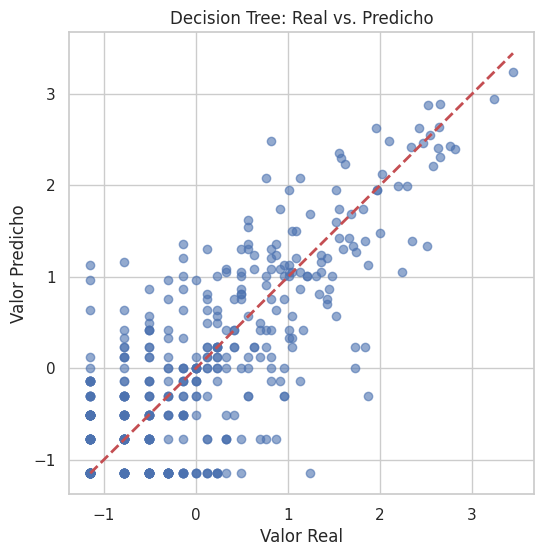

In [27]:
#@title **2.1 Scatter Real vs. Predicho**

plt.figure(figsize=(6,6))
plt.scatter(y_test, tree_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Decision Tree: Real vs. Predicho")
plt.grid(True)
plt.show()

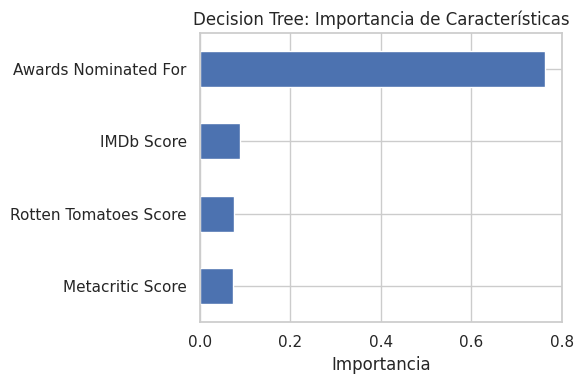

In [28]:
#@title **2.2 Importancia De Características**

feature_importances = pd.Series(tree_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=True)

plt.figure(figsize=(6,4))
feature_importances.plot(kind='barh')
plt.title("Decision Tree: Importancia de Características")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


---

### **Análisis de Visualizaciones Modelo 2: Árbol de Decisión**

Se incluyen dos gráficos clave para interpretar el rendimiento y la estructura del modelo de Árbol de Decisión:

1.  **Decision Tree: Real vs. Predicho (Primer gráfico 2.1)**
    * Este diagrama de dispersión **compara los valores reales de la variable objetivo con los valores predichos** por el Árbol de Decisión.
    * La línea discontinua roja representa la predicción perfecta (valor real = valor predicho).
    * Los puntos muestran una **tendencia general a seguir la línea diagonal** lo que sugiere que el modelo tiene cierta capacidad predictiva. Sin embargo, en comparación con un modelo lineal a menudo se observa una **mayor "discretización" de los puntos en el eje Y (valores predichos)**. Esto se debe a que los árboles de decisión predicen valores discretos (o un número limitado de valores) en cada hoja lo que puede manifestarse como bandas horizontales de puntos. A pesar de esto la agrupación alrededor de la línea indica un rendimiento razonable.

2.  **Decision Tree: Importancia de Características (Segundo gráfico 2.2)**
    * Este gráfico de barras horizontal **muestra la importancia relativa de cada característica de entrada** para el modelo de Árbol de Decisión.
    * Las características con barras más largas son las que el modelo consideró más influyentes para hacer sus predicciones.
    * En este caso se observa claramente que **`Awards Nominated For` es por mucho la característica más importante** para el modelo. Las puntuaciones de IMDb, Rotten Tomatoes y Metacritic tienen una importancia mucho menor y muy similar entre sí. Esto indica que el número de nominaciones fue el factor que más ayudó al árbol a tomar decisiones de predicción sobre la variable objetivo.

---

---

### **Modelo 3: Random Forest para Regresión**

Se implementa y evalúa un **Modelo de Random Forest (Bosque Aleatorio) para tareas de regresión** un algoritmo de ensamble conocido por su robustez y precisión.

### Implementación y Evaluación del Modelo

1.  **Creación y Entrenamiento del Modelo:**
    * Se **inicializa y entrena** un modelo `RandomForestRegressor` utilizando los datos de entrenamiento (`X_train`, `y_train`). Este modelo construye múltiples árboles de decisión y promedia sus predicciones para mejorar la robustez y reducir el sobreajuste.
2.  **Generación de Predicciones:**
    * El modelo entrenado **realiza predicciones** sobre el conjunto de prueba (`X_test`), generando `forest_predictions`.
3.  **Métricas de Rendimiento:**
    * Se calculan el **Error Cuadrático Medio (MSE)** y el **R Cuadrado (R²)** para cuantificar la precisión del modelo. Estos valores se imprimen para una evaluación numérica.

---

In [29]:
# Crear modelo de bosque aleatorio (Random Forest)
forest_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
forest_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
forest_predictions = forest_model.predict(X_test)

# Calcular MSE del Random Forest
forest_mse = mean_squared_error(y_test, forest_predictions)

# Calcular R^2 del Random Forest
forest_r2 = r2_score(y_test, forest_predictions)

# Mostrar resultados del modelo de bosque aleatorio
print(f"Random Forest - MSE: {forest_mse}, R^2: {forest_r2}")

Random Forest - MSE: 0.28515206385389463, R^2: 0.7209500890551563


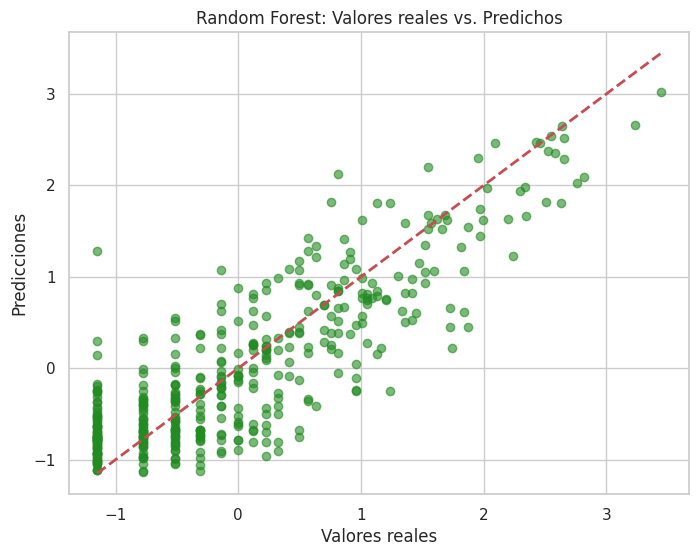

In [30]:
#@title **3.1 Gráfico de Valores Reales vs. Predicciones**

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, forest_predictions, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Random Forest: Valores reales vs. Predichos")
plt.show()

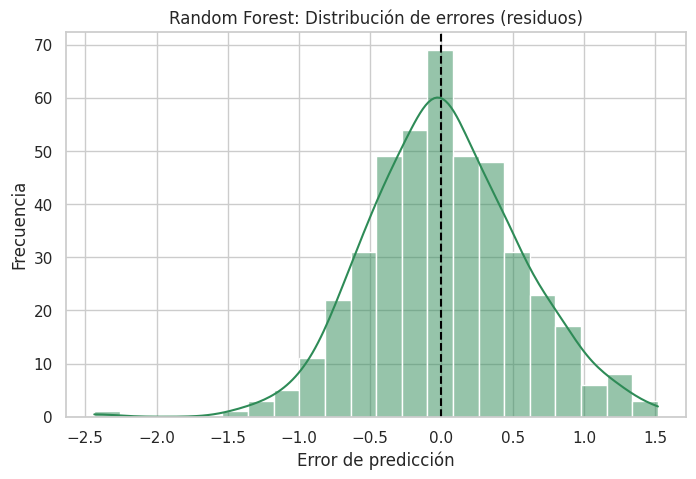

In [31]:
#@title **3.2  Histograma De Residuos (Errores)**

residuals_rf = y_test - forest_predictions

plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, color='seagreen')
plt.axvline(0, color='black', linestyle='--')
plt.title("Random Forest: Distribución de errores (residuos)")
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.show()

---

### **Análisis de Visualizaciones Modelo 3: RANDOM FOREST**

Se incluyen dos gráficos que ayudan a interpretar el rendimiento del modelo de Random Forest:

1.  **Random Forest: Valores reales vs. Predichos (Primer gráfico 3.1)**
    * Este diagrama de dispersión **compara los valores reales de la variable objetivo con los valores predichos** por el modelo de Random Forest.
    * La línea discontinua roja representa la predicción perfecta *y=x*.
    * Se observa que los puntos están **bastante agrupados alrededor de la línea diagonal** lo que indica que el modelo de Random Forest tiene una **buena capacidad predictiva**. La dispersión es menor en comparación con el árbol de decisión individual lo que es característico de los métodos de ensamble que reducen la varianza. La mayor concentración de puntos cerca de la línea sugiere que las predicciones son en general bastante precisas.

2.  **Random Forest: Distribución de errores (residuos) (Segundo gráfico 3.2)**
    * Este histograma muestra la **distribución de los errores de predicción** (residuos) del modelo.
    * Se espera que los errores de un buen modelo se distribuyan **normalmente y estén centrados alrededor de cero**.
    * La imagen muestra que la distribución de los errores es **claramente normal (en forma de campana)** y está **centrada muy cerca de cero** (indicado por la línea vertical discontinua negra). Esta es una señal muy positiva que indica que el modelo no tiene sesgos sistemáticos en sus errores y que las predicciones son, en promedio, correctas. La forma suave de la curva sugiere una buena calidad de las predicciones.


---

---
### **Modelo 4: Gradient Boosting**

Se describe la implementación y evaluación de un **Modelo de Gradient Boosting para tareas de regresión**, un poderoso algoritmo de ensamble que construye modelos de forma secuencial para corregir los errores de los modelos anteriores.

### Implementación y Evaluación del Modelo

1.  **Creación y Entrenamiento del Modelo:**
    * Se **inicializa y entrena** un modelo `GradientBoostingRegressor` utilizando los datos de entrenamiento (`X_train`, `y_train`). Este algoritmo construye una serie de árboles de decisión de forma aditiva, donde cada nuevo árbol corrige los errores del conjunto de árboles anteriores.
2.  **Generación de Predicciones:**
    * El modelo entrenado **realiza predicciones** sobre el conjunto de prueba (`X_test`), obteniendo `gbr_predictions`.
3.  **Métricas de Rendimiento:**
    * Se calculan el **Error Cuadrático Medio (MSE)** y el **R Cuadrado (R²)** para cuantificar la precisión del modelo. Estos valores se imprimen para una evaluación numérica.

---

In [32]:
# Creamos el modelo de Gradient Boosting con un valor fijo de aleatoriedad para reproducibilidad
gbr_model = GradientBoostingRegressor(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
gbr_model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
gbr_predictions = gbr_model.predict(X_test)

# Calculamos el error cuadrático medio (MSE) para saber qué tanto se equivoca el modelo
gbr_mse = mean_squared_error(y_test, gbr_predictions)

# Calculamos R², que nos indica qué porcentaje de la variabilidad en los datos explica el modelo
gbr_r2 = r2_score(y_test, gbr_predictions)

# Mostramos los resultados
print(f"Gradient Boosting - MSE: {gbr_mse}, R^2: {gbr_r2}")

Gradient Boosting - MSE: 0.2635599199496599, R^2: 0.742080168747205


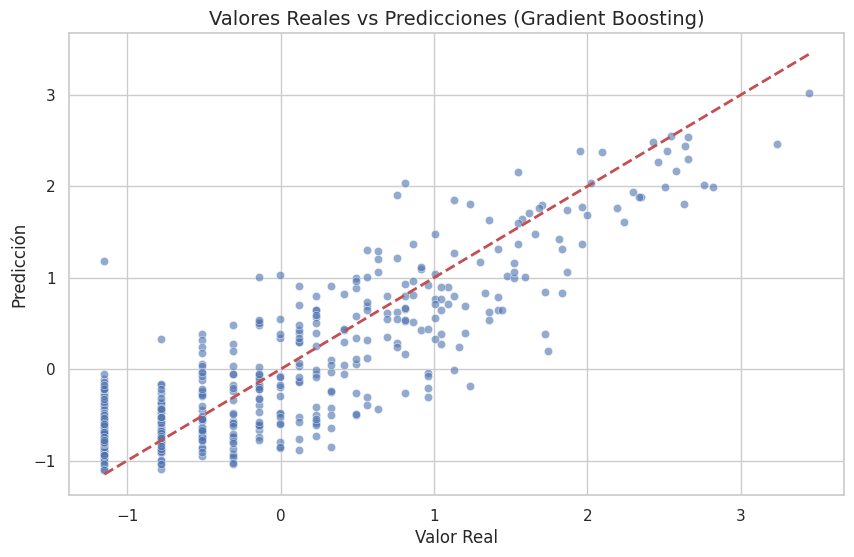

In [33]:
#@title **4.1 Gráfico de Valores Reales vs. Predicciones**

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gbr_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reales vs Predicciones (Gradient Boosting)', fontsize=14)
plt.xlabel('Valor Real', fontsize=12)
plt.ylabel('Predicción', fontsize=12)
plt.grid(True)
plt.show()

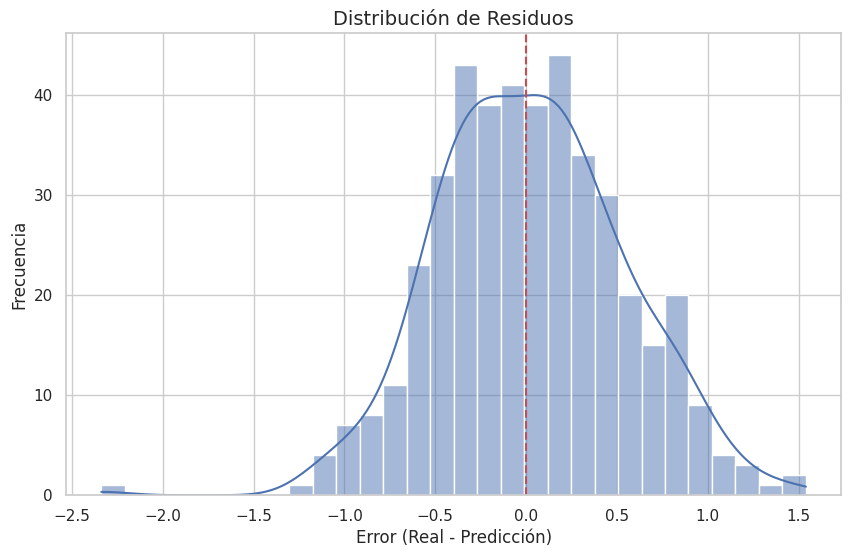

In [34]:
#@title **4.2  Histograma De Residuos (Errores)**

residuos = y_test - gbr_predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.title('Distribución de Residuos', fontsize=14)
plt.xlabel('Error (Real - Predicción)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()


---

### **Análisis de Visualizaciones Modelo 4: Gradient Boosting**

1.  **Valores Reales vs. Predichos (Gráfico similar al de Regresión Lineal/Random Forest 4.1):**
    * Se esperaría que los puntos de datos estén **fuertemente agrupados alrededor de la línea diagonal *y=x*, mostrando una **excelente capacidad predictiva**. Los modelos de Gradient Boosting suelen tener un rendimiento muy alto, con una menor dispersión de los puntos que los modelos individuales o incluso Random Forest debido a su naturaleza de mejora continua.

2.  **Distribución de Errores (Residuos) (Gráfico similar al de Random Forest 4.2):**
    * La distribución de los errores (residuos) se esperaría que fuera **muy cercana a una distribución normal** **centrada en cero** y con una **varianza pequeña**. Esto indicaría que el modelo está bien ajustado y que sus errores son aleatorios sin sesgos sistemáticos.

---

## **Modelos De Clasificacion Supervisada**

In [35]:
#@title **Preparacion Para Implementar Los Modelos**

df_classification = df.copy()

# Crear un array temporal de ceros con las dimensiones correctas
dummy_array = np.zeros((df_classification['Target'].shape[0], len(cols_to_scale)))

# Poner los valores escalados de 'Target' en la columna correspondiente
dummy_array[:, cols_to_scale.index('Target')] = df_classification['Target']

# Desescalar el array completo
descaled_array = scaler.inverse_transform(dummy_array)

# Extraer la columna de 'Target' desescalada
df_classification['Awards Received_OriginalScale'] = descaled_array[:, cols_to_scale.index('Target')]

# Deshacer la transformación logarítmica (np.log1p se deshace con np.expm1)
df_classification['Awards Received_Original'] = np.expm1(df_classification['Awards Received_OriginalScale'])

# Definir el umbral para la clasificación binaria
median_awards = df_classification['Awards Received_Original'].median()
print(f"La mediana de 'Awards Received' es: {median_awards:.2f}")

# 1 si la película recibió más premios que la mediana, 0 en caso contrario
df_classification['Awards_Category'] = (df_classification['Awards Received_Original'] > median_awards).astype(int)

# Verificar el balance de clases
print("\nConteo de clases en 'Awards_Category':")
print(df_classification['Awards_Category'].value_counts())
print(f"Porcentaje de clase 0: {df_classification['Awards_Category'].value_counts(normalize=True)[0]:.2f}")
print(f"Porcentaje de clase 1: {df_classification['Awards_Category'].value_counts(normalize=True)[1]:.2f}")

# Usamos las 'features' ya escaladas del df original
X_cls = df_classification[features]

# La nueva variable objetivo categórica
y_cls = df_classification['Awards_Category']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%) para clasificación
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

La mediana de 'Awards Received' es: 4.00

Conteo de clases en 'Awards_Category':
Awards_Category
0    1078
1    1077
Name: count, dtype: int64
Porcentaje de clase 0: 0.50
Porcentaje de clase 1: 0.50


In [36]:
#@title **MODELO 1: Regresion Logistica**

# Crear modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42, solver='liblinear')

# Entrenar el modelo
logistic_model.fit(X_train_cls, y_train_cls)

# Predecir sobre los datos de prueba
logistic_predictions = logistic_model.predict(X_test_cls)

# Evaluar el modelo
print("\n--- Regresión Logística ---")
print(f"Accuracy: {accuracy_score(y_test_cls, logistic_predictions):.4f}")
print(f"Precision: {precision_score(y_test_cls, logistic_predictions):.4f}")
print(f"Recall: {recall_score(y_test_cls, logistic_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_cls, logistic_predictions):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_cls, logistic_predictions))
print("\nReporte de Clasificación:\n", classification_report(y_test_cls, logistic_predictions))


--- Regresión Logística ---
Accuracy: 0.8283
Precision: 0.8439
Recall: 0.8047
F1-Score: 0.8238

Matriz de Confusión:
 [[184  32]
 [ 42 173]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       216
           1       0.84      0.80      0.82       215

    accuracy                           0.83       431
   macro avg       0.83      0.83      0.83       431
weighted avg       0.83      0.83      0.83       431



In [37]:
#@title **MODELO 2: Arbol De Decision**

# Crear modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt_model.fit(X_train_cls, y_train_cls)

# Predecir sobre los datos de prueba
dt_predictions = dt_model.predict(X_test_cls)

# Evaluar el modelo
print("\n--- Árboles de Decisión ---")
print(f"Accuracy: {accuracy_score(y_test_cls, dt_predictions):.4f}")
print(f"Precision: {precision_score(y_test_cls, dt_predictions):.4f}")
print(f"Recall: {recall_score(y_test_cls, dt_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_cls, dt_predictions):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_cls, dt_predictions))
print("\nReporte de Clasificación:\n", classification_report(y_test_cls, dt_predictions))


--- Árboles de Decisión ---
Accuracy: 0.7773
Precision: 0.7931
Recall: 0.7488
F1-Score: 0.7703

Matriz de Confusión:
 [[174  42]
 [ 54 161]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       216
           1       0.79      0.75      0.77       215

    accuracy                           0.78       431
   macro avg       0.78      0.78      0.78       431
weighted avg       0.78      0.78      0.78       431



In [38]:
#@title **MODELO 3: Random Forest**

# Crear modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo
rf_model.fit(X_train_cls, y_train_cls)

# Predecir sobre los datos de prueba
rf_predictions = rf_model.predict(X_test_cls)

# Evaluar el modelo
print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_score(y_test_cls, rf_predictions):.4f}")
print(f"Precision: {precision_score(y_test_cls, rf_predictions):.4f}")
print(f"Recall: {recall_score(y_test_cls, rf_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_cls, rf_predictions):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_cls, rf_predictions))
print("\nReporte de Clasificación:\n", classification_report(y_test_cls, rf_predictions))


--- Random Forest Classifier ---
Accuracy: 0.8306
Precision: 0.8550
Recall: 0.7953
F1-Score: 0.8241

Matriz de Confusión:
 [[187  29]
 [ 44 171]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       216
           1       0.85      0.80      0.82       215

    accuracy                           0.83       431
   macro avg       0.83      0.83      0.83       431
weighted avg       0.83      0.83      0.83       431



In [39]:
#@title **MODELO 4: Gradient Boosting**

# Crear modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Entrenar el modelo
gb_model.fit(X_train_cls, y_train_cls)

# Predecir sobre los datos de prueba
gb_predictions = gb_model.predict(X_test_cls)

# Evaluar el modelo
print("\n--- Gradient Boosting Classifier ---")
print(f"Accuracy: {accuracy_score(y_test_cls, gb_predictions):.4f}")
print(f"Precision: {precision_score(y_test_cls, gb_predictions):.4f}")
print(f"Recall: {recall_score(y_test_cls, gb_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_cls, gb_predictions):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_cls, gb_predictions))
print("\nReporte de Clasificación:\n", classification_report(y_test_cls, gb_predictions))


--- Gradient Boosting Classifier ---
Accuracy: 0.8237
Precision: 0.8840
Recall: 0.7442
F1-Score: 0.8081

Matriz de Confusión:
 [[195  21]
 [ 55 160]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       216
           1       0.88      0.74      0.81       215

    accuracy                           0.82       431
   macro avg       0.83      0.82      0.82       431
weighted avg       0.83      0.82      0.82       431



### **Analisis**

| Modelo                     | Accuracy | Precision | Recall | F1-Score |
|----------------------------|----------|-----------|--------|----------|
| Regresión Logística        | 0.8283   | 0.8439    | 0.8047 | 0.8238   |
| Árboles de Decisión        | 0.7773   | 0.7931    | 0.7488 | 0.7703   |
| Random Forest Classifier   | **0.8306** | **0.8550**| 0.7953 | **0.8241** |
| Gradient Boosting Classifier| 0.8237   | 0.8840    | **0.7442** | 0.8081   |


El Random Forest Classifier es el modelo más equilibrado y con mejor rendimiento general, destacando en Accuracy (0.8306) y F1-Score (0.8241). Ofrece una alta Precision (0.8550), lo que significa que sus predicciones positivas son muy fiables.

La Regresión Logística es una alternativa fuerte, con métricas muy similares y un Recall ligeramente superior (0.8047). El Gradient Boosting Classifier muestra la Precision más alta (0.8840), pero con un Recall más bajo (0.7442), indicando que es muy preciso cuando predice positivo, pero puede pasar por alto más casos reales.

El modelo de Árboles de Decisión fue el de menor rendimiento (Accuracy: 0.7773) y el menos recomendado para este análisis.

En conclusion Random Forest Classifier es la mejor opción para este problema, balanceando efectivamente todas las métricas.

## **Modelos De Clasificacion No Supervisada**




In [40]:
#@title **Preparacion Para Implementar Los Modelos**

# Selecciona las características que se usarán para el clustering
features = ['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Hidden Gem Score']
X = df[features].values

# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convierte los datos escalados de nuevo a un DataFrame para facilitar la selección por nombre de columna
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nPrimeras 5 filas de X_scaled_df después del preprocesamiento y escalado:")
print(X_scaled_df.head())
print(f"Dimensiones de los datos escalados (X_scaled): {X_scaled.shape}")

# Define los índices de las características para la visualización
feature1_name = 'IMDb Score'
feature2_name = 'Rotten Tomatoes Score'
feature1_idx = features.index(feature1_name)
feature2_idx = features.index(feature2_name)


Primeras 5 filas de X_scaled_df después del preprocesamiento y escalado:
   IMDb Score  Rotten Tomatoes Score  Metacritic Score  Hidden Gem Score
0    1.223868               1.279736          1.243185          0.828355
1    1.774435               0.088946         -0.115876          0.094763
2   -0.317719              -0.546143         -0.588593         -0.547131
3    1.444094               1.200350          1.420454          0.920054
4    0.232848               0.763727          0.652289          0.369860
Dimensiones de los datos escalados (X_scaled): (2155, 4)


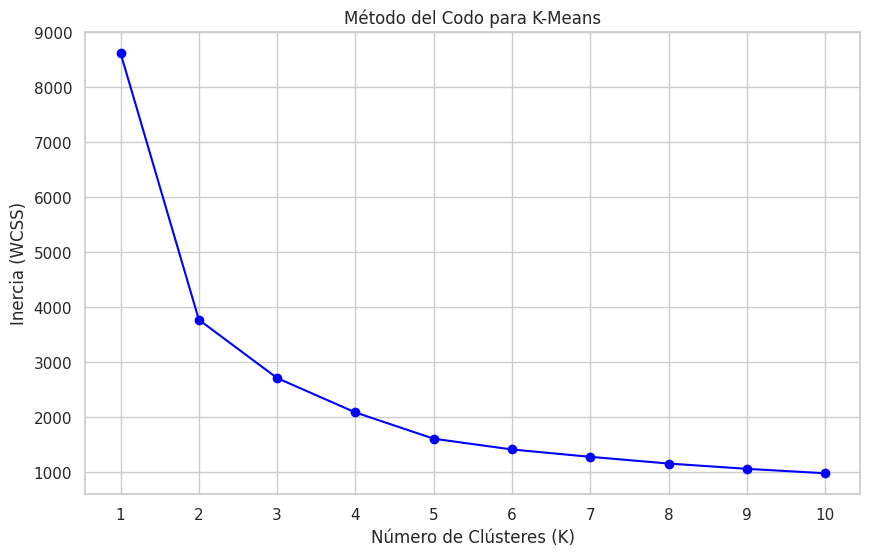

In [41]:
#@title **Método Del Codo Para K-Means**

# Lista para almacenar la suma de los cuadrados de las distancias (Inercia)
wcss = []

# Rango de valores de K a probar (de 1 a 10)
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # La inercia es la suma de los cuadrados de las distancias al centroide

# --- Visualización del Método del Codo ---
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Conteo de elementos por clúster (K-Means con K = 4):
KMeans_Cluster
0    844
1    801
2    417
3     93
Name: count, dtype: int64


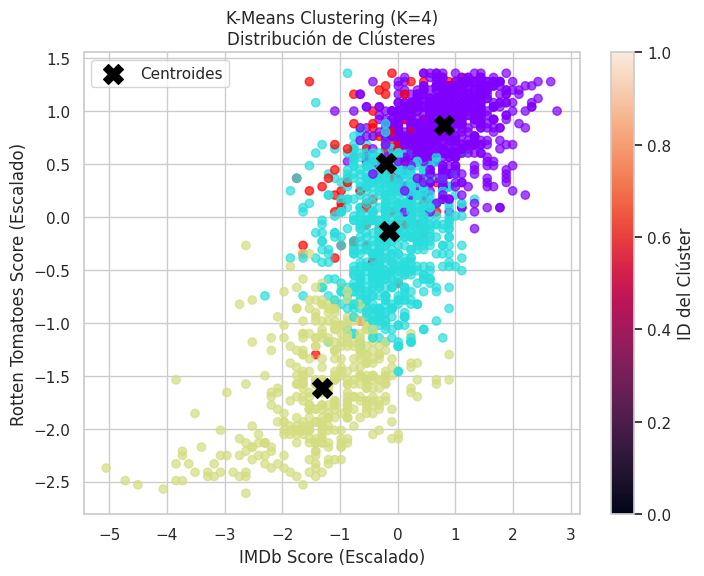

Dimensiones de los centroides de K-Means: (4, 4)


In [42]:
#@title **MODELO 1: K-Means Clustering**

# Define el número óptimo de clústeres (basado en la gráfica del codo)
optimal_k_kmeans = 4

# Inicializa y entrena el modelo K-Means
kmeans_model = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10)
kmeans_model.fit(X_scaled)

# Asigna las etiquetas de clúster de vuelta al DataFrame original
df['KMeans_Cluster'] = kmeans_model.labels_
print(f"Conteo de elementos por clúster (K-Means con K = {optimal_k_kmeans}):")
print(df['KMeans_Cluster'].value_counts())

# --- Visualización para K-Means ---
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, feature1_idx], X_scaled[:, feature2_idx],
            c=df['KMeans_Cluster'], cmap='rainbow', alpha=0.7)
plt.scatter(kmeans_model.cluster_centers_[:, feature1_idx],
            kmeans_model.cluster_centers_[:, feature2_idx],
            s=200, c='black', marker='X', label='Centroides')
plt.title(f'K-Means Clustering (K={optimal_k_kmeans})\nDistribución de Clústeres')
plt.xlabel(f'{feature1_name} (Escalado)')
plt.ylabel(f'{feature2_name} (Escalado)')
plt.legend()
plt.grid(True)
plt.colorbar(label='ID del Clúster')
plt.show()

print("Dimensiones de los centroides de K-Means:", kmeans_model.cluster_centers_.shape)

Conteo de elementos por clúster (DBSCAN):
DBSCAN_Cluster
 0    2014
-1     119
 2       6
 1       6
 4       5
 3       5
Name: count, dtype: int64


<ipython-input-43-199ca6d42c5e>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('rainbow', len(unique_labels))


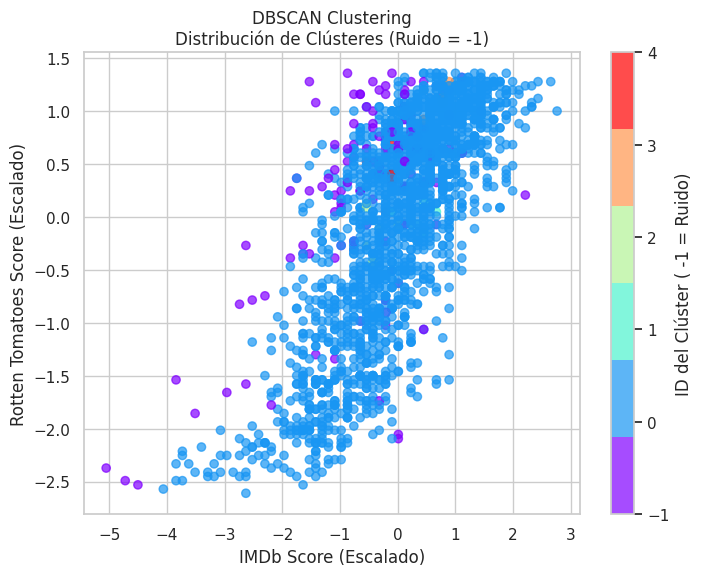

In [43]:
#@title **MODELO 2: DBSCAN Clustering**

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(X_scaled)

# Asigna las etiquetas de clúster de vuelta al DataFrame original
df['DBSCAN_Cluster'] = dbscan_model.labels_
print("Conteo de elementos por clúster (DBSCAN):")
print(df['DBSCAN_Cluster'].value_counts())

# --- Visualización para DBSCAN ---
plt.figure(figsize=(8, 6))
unique_labels = np.unique(df['DBSCAN_Cluster'])
colors = plt.cm.get_cmap('rainbow', len(unique_labels))

plt.scatter(X_scaled[:, feature1_idx], X_scaled[:, feature2_idx],
            c=df['DBSCAN_Cluster'], cmap=colors, alpha=0.7)
plt.title('DBSCAN Clustering\nDistribución de Clústeres (Ruido = -1)')
plt.xlabel(f'{feature1_name} (Escalado)')
plt.ylabel(f'{feature2_name} (Escalado)')
plt.grid(True)
plt.colorbar(label='ID del Clúster ( -1 = Ruido)')
plt.show()

Conteo de elementos por clúster (Agglomerative con K = 4):
Agglomerative_Cluster
0    1152
2     532
1     364
3     107
Name: count, dtype: int64


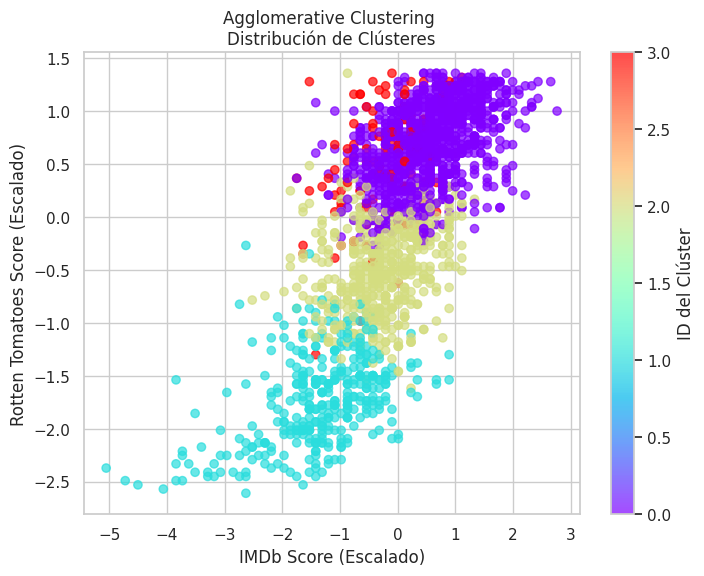

In [44]:
#@title **MODELO 3: Agglomerative Clustering**

n_clusters_agglomerative = 4

# Inicializa y entrena el modelo Agglomerative Clustering
agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters_agglomerative, linkage='ward')
agglomerative_model.fit(X_scaled)

# Asigna las etiquetas de clúster de vuelta al DataFrame original
df['Agglomerative_Cluster'] = agglomerative_model.labels_

print(f"Conteo de elementos por clúster (Agglomerative con K = {n_clusters_agglomerative}):")
print(df['Agglomerative_Cluster'].value_counts())

# --- Visualización para Agglomerative Clustering ---
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, feature1_idx], X_scaled[:, feature2_idx],
            c=df['Agglomerative_Cluster'], cmap='rainbow', alpha=0.7)
plt.title(f'Agglomerative Clustering \nDistribución de Clústeres')
plt.xlabel(f'{feature1_name} (Escalado)')
plt.ylabel(f'{feature2_name} (Escalado)')
plt.grid(True)
plt.colorbar(label='ID del Clúster')
plt.show()


<ipython-input-45-b45471bf2830>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


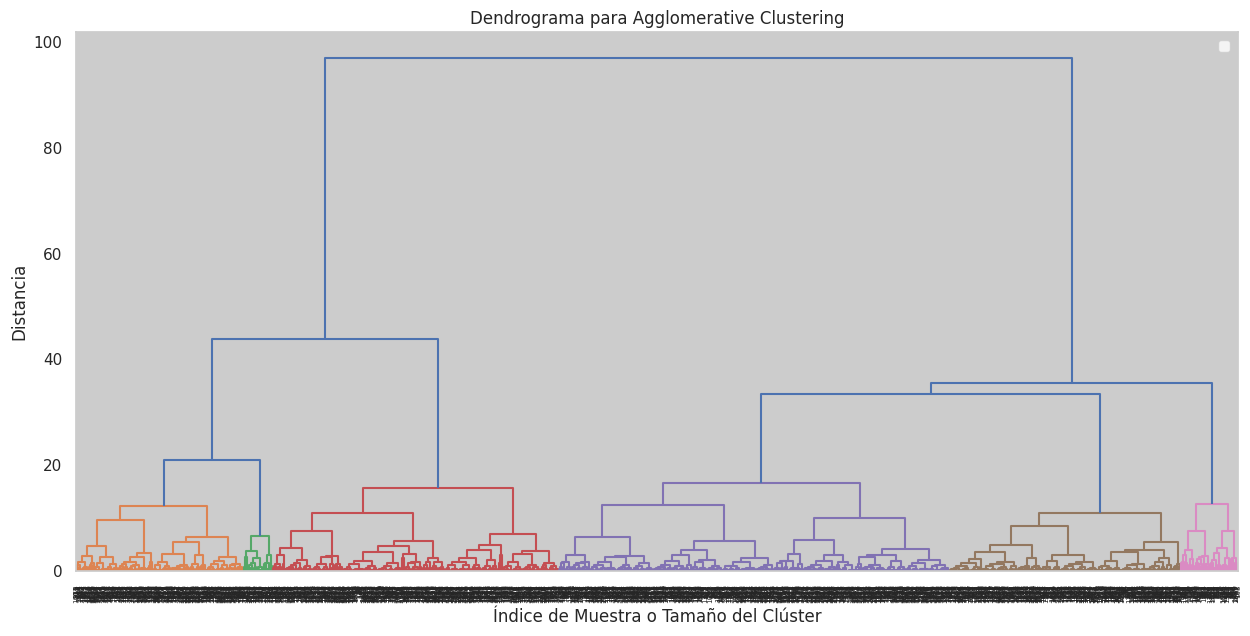

In [45]:
#@title **Generación Del Dendrograma Para Agglomerative Clustering**

# Genera la matriz de enlace
linked = linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(15, 7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=20,

)
plt.title('Dendrograma para Agglomerative Clustering')
plt.xlabel('Índice de Muestra o Tamaño del Clúster')
plt.ylabel('Distancia')
plt.legend()
plt.show()